In [41]:
import pandas as pd
# df = pd.read_csv('EURUSD.csv')
df = pd.read_csv('EURUSD.csv', delimiter='\t')
df.columns = [col.replace('<', '').replace('>', '') for col in df.columns]
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2021.08.02,1.18641,1.18969,1.18590,1.18688,47011,0,0
1,2021.08.03,1.18670,1.18933,1.18537,1.18637,49688,0,0
2,2021.08.04,1.18631,1.18997,1.18328,1.18367,48391,0,0
3,2021.08.05,1.18360,1.18572,1.18282,1.18327,47001,0,0
4,2021.08.06,1.18324,1.18357,1.17544,1.17611,47467,0,0
...,...,...,...,...,...,...,...,...
861,2024.11.20,1.05898,1.06097,1.05068,1.05431,38714,0,0
862,2024.11.21,1.05431,1.05548,1.04621,1.04734,42696,0,0
863,2024.11.22,1.04732,1.04979,1.03313,1.04178,48855,0,0
864,2024.11.25,1.04799,1.05300,1.04490,1.04928,49321,0,0


<Axes: >

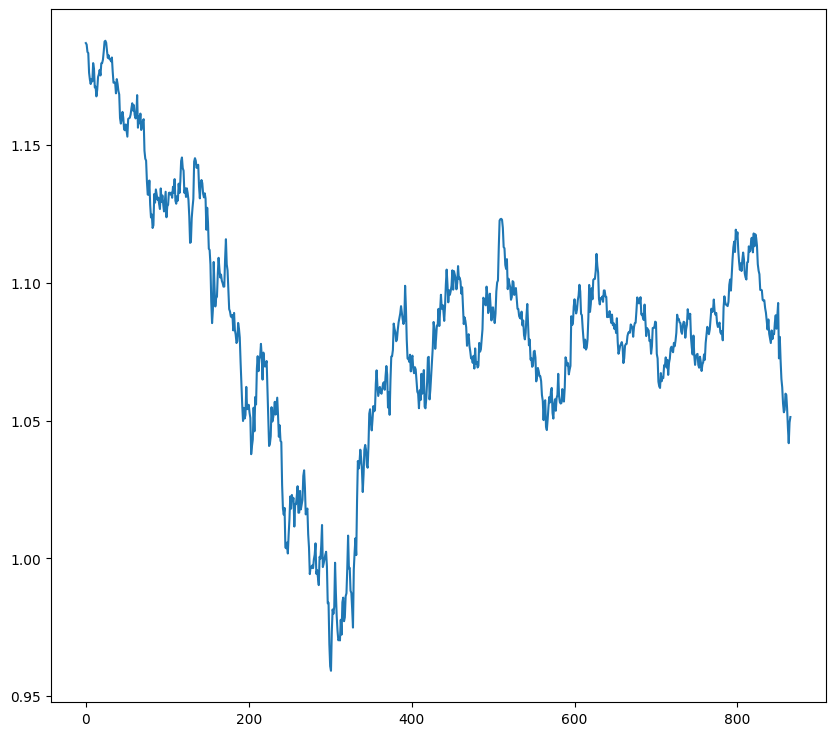

In [42]:
df['CLOSE'].plot(figsize=(10, 9))

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
x_data = df['CLOSE'].values

def get_train_test(split_percent, data):
    n = len(data)
    split = int(n * split_percent)
    train_data = data[:split]
    test_data = data[split:]
    return train_data, test_data
split_percent = 0.8     ## 80% of data for train data and 20% of data for test
train_data, test_data = get_train_test(split_percent, x_data)
# print(len(train_data))

def gen_seq(data,timesteps):
  x, y = [], []
  for i in range(len(data)-timesteps):
    x.append(data[i:i+timesteps])
    y.append(data[i+timesteps])
  return np.array(x), np.array(y)
time_steps = 7 
trainX, trainY = gen_seq(train_data, time_steps)
testX, testY = gen_seq(test_data, time_steps)

scaler = MinMaxScaler(feature_range=(0,1))
x_train_scar = scaler.fit_transform(trainX.reshape(-1,1))
trainX = x_train_scar.reshape(trainX.shape[0],trainX.shape[1],1)
# print(x_train_scar)

x_test_scar = scaler.transform(testX.reshape(-1,1))
testX = x_test_scar.reshape(testX.shape[0],testX.shape[1],1)

# trainY = scaler.fit_transform(trainY.reshape(-1,1))
# trainY = trainY.reshape(trainY.shape[0])
# testY = scaler.fit_transform(testY.reshape(-1,1))
# testY = testY.reshape(testY.shape[0])

# print(trainY)
# print(trainY.shape)


In [67]:
print(trainX.shape, trainY.shape,testX.shape)
print(trainX)

(685, 7, 1) (685,) (167, 7, 1)
[[[0.99632353]
  [0.99409139]
  [0.98227416]
  ...
  [0.94918592]
  [0.93828782]
  [0.93132878]]

 [[0.99409139]
  [0.98227416]
  [0.98052346]
  ...
  [0.93828782]
  [0.93132878]
  [0.93942577]]

 [[0.98227416]
  [0.98052346]
  [0.94918592]
  ...
  [0.93132878]
  [0.93942577]
  [0.93539916]]

 ...

 [[0.56551996]
  [0.56670168]
  [0.56039916]
  ...
  [0.58127626]
  [0.55462185]
  [0.53125   ]]

 [[0.56670168]
  [0.56039916]
  [0.55676646]
  ...
  [0.55462185]
  [0.53125   ]
  [0.54407388]]

 [[0.56039916]
  [0.55676646]
  [0.58127626]
  ...
  [0.53125   ]
  [0.54407388]
  [0.54219188]]]


In [88]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Input(shape = (time_steps, 1)),        
    SimpleRNN(50, activation='tanh'),       
    Dense(1, activation = 'linear')        
    ])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=30, batch_size=1)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0189
Epoch 2/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.9509e-04
Epoch 3/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7411e-04
Epoch 4/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8703e-04
Epoch 5/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1075e-04
Epoch 6/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.4317e-04
Epoch 7/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6584e-04
Epoch 8/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3134e-04
Epoch 9/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3418e-04
Epoch 10/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7155e-04
Epoch 11/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6199e-04
Epoch 12/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1073e-04
Epoch 13/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5556e-04
Epoch 14/30
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1704e-04
Epoch

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, GRU, Dense, TimeDistributed, RepeatVector
model = Sequential([
    Input(shape=(input_steps, 2)),                  # (time step, feature)
    GRU(50, activation='tanh'),                # Encoder layer
    RepeatVector(output_steps),                     # Repeat vector for generating the output sequence length
    GRU(50, activation='tanh', return_sequences=True),  ## Decoder layer
    TimeDistributed(Dense(1, activation='sigmoid'))  # TimeDistributed allows to apply a Dense layer to each time step
])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=20, batch_size=16)

In [94]:
day15 = df["CLOSE"].tail(7).values
day15 = scaler.transform(day15.reshape(-1,1))
day15 = day15.reshape(day15.shape[1],day15.shape[0],1)
# print(day15.shape)
print(day15)

day15 = day15.reshape(1,7,1)
print(model.predict(day15))

[[[0.43986345]
  [0.43798144]
  [0.41609769]
  [0.38559174]
  [0.361257  ]
  [0.39408263]
  [0.40279237]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1.0491047]]


In [92]:
xxx = testX[155].reshape(1,7,1)
yy = model.predict(xxx)
print(xxx)
print('actual output', testY[155])
print('predict output', yy)

from sklearn.metrics import mean_squared_error

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# print(test_predict)
# print(len(test_predict[0]))
train_rmse = mean_squared_error(trainY, train_predict)
test_rmse = mean_squared_error(testY, test_predict)
print('Train RMSE: %.10f RMSE' % (train_rmse))
print('Test RMSE: %.10f RMSE' % (test_rmse))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[[0.56429447]
  [0.54297969]
  [0.56210609]
  [0.58381478]
  [0.49588585]
  [0.53002451]
  [0.49260329]]]
actual output 1.06509
predict output [[1.0713407]]
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train RMSE: 0.0000397244 RMSE
Test RMSE: 0.0000233798 RMSE


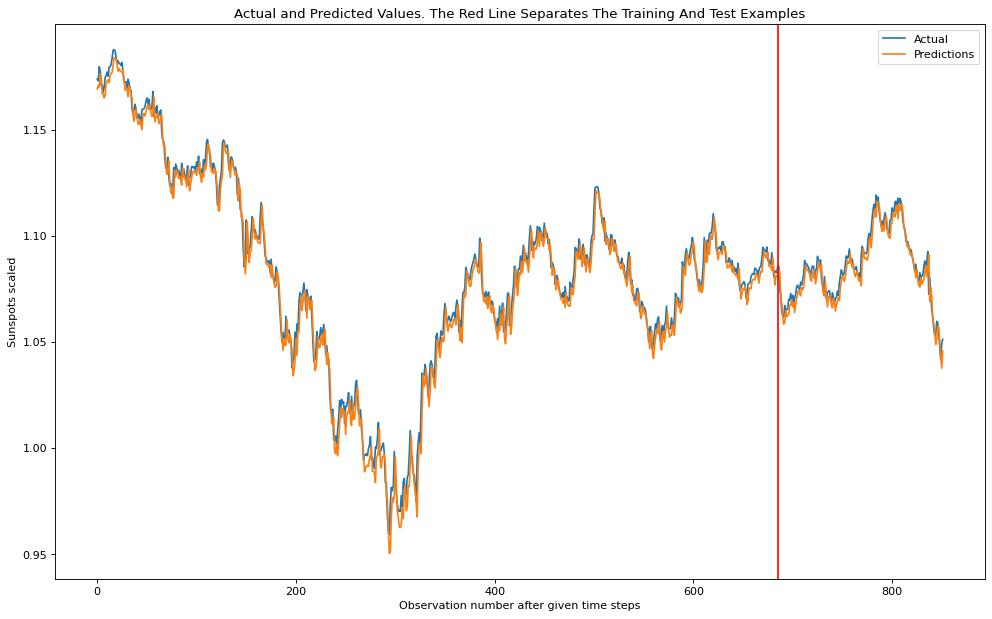

In [91]:
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 9), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

plot_result(trainY, testY, train_predict, test_predict)